# Random Forest MNIST prediction

## 1. Imports

In [120]:
import sklearn
import numpy as np
from tensorflow import keras

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## 2. Load Data

In [121]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [122]:
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [123]:
# Each pixel intensity is represented as a byte (0 to 255).
X_train_full.dtype

dtype('uint8')

## About the MNIST Dataset
The MNIST dataset consists of 70,000 grayscale images of handwritten digits (0-9), each sized 28x28 pixels. It is a standard benchmark for image classification algorithms.

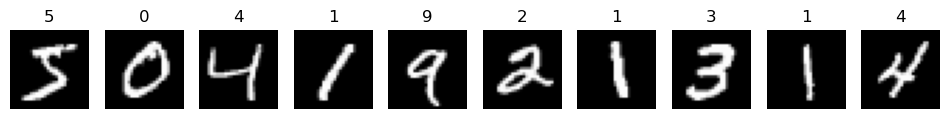

In [124]:
# Visualize some sample images from the training set
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 10, figsize=(12, 2))
for i in range(10):
    axes[i].imshow(X_train_full[i], cmap='gray')
    axes[i].set_title(str(y_train_full[i]))
    axes[i].axis('off')
plt.show()

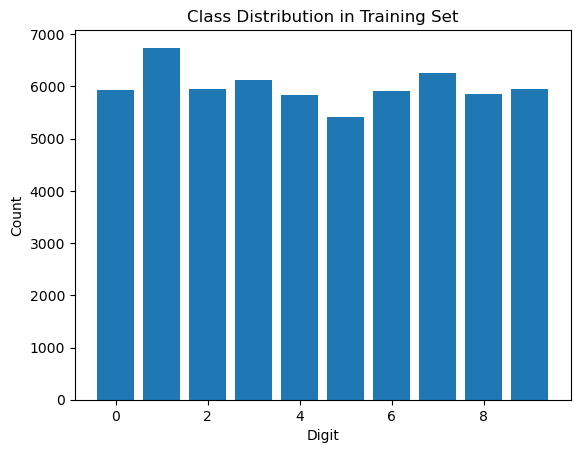

In [125]:
# Show class distribution in the training set
import collections
counter = collections.Counter(y_train_full)
plt.bar(counter.keys(), counter.values())
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Class Distribution in Training Set')
plt.show()

### Preprocessing
We flatten each image and scale pixel values to [0, 1] for better model performance.

In [126]:
X_train_full.shape[0]

60000

In [127]:
X_train_full.astype(np.float32)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [128]:
X_train_full.reshape((X_train_full.shape[0], -1))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [129]:
X_train_prepared = X_train_full.astype(np.float32).reshape((X_train_full.shape[0], -1)) 
X_test_prepared = X_test.astype(np.float32).reshape((X_test.shape[0], -1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier(random_state=42)

pipeline_rf = Pipeline([
    ("random_forest", rf)
])


## Training

In [131]:
# Use GridSearchCV to fine-tune hyperparameters for a DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import time  # For timing


params = { 'random_forest__n_estimators': [100, 200] }

grid_search = GridSearchCV(pipeline_rf, params, n_jobs=-1, cv=2)

start_train = time.time()

grid_search.fit(X_train_prepared, y_train_full)

end_train = time.time()
print(f"Training time: {end_train - start_train:.2f} seconds")



Training time: 110.47 seconds


In [132]:
grid_search.best_params_

{'random_forest__n_estimators': 200}

## Evaluate

## Results & Next Steps
The Random Forest classifier achieves high accuracy on MNIST. For further improvement, consider tuning more hyperparameters, using feature engineering, or trying other ensemble methods.

In [133]:
# Timing the prediction process
start_pred = time.time()
y_pred = grid_search.predict(X_test_prepared)
end_pred = time.time()
print(f"Prediction time: {end_pred - start_pred:.2f} seconds")

# If you want accuracy (for classification), round predictions and compare:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

Prediction time: 0.72 seconds


0.9707

In [134]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



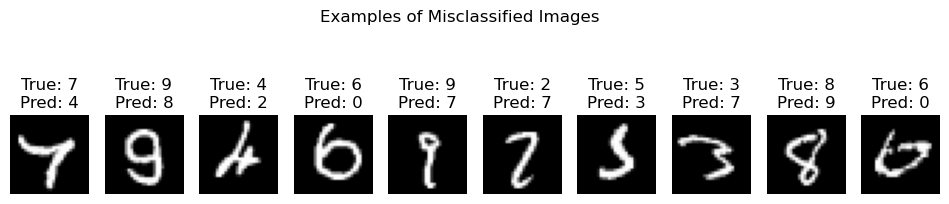

In [135]:
# Error analysis: Show some misclassified images
import numpy as np
import matplotlib.pyplot as plt

misclassified_idx = np.where(y_pred != y_test)[0]
num_to_show = min(10, len(misclassified_idx))
plt.figure(figsize=(12, 3))
for i in range(num_to_show):
    idx = misclassified_idx[i]
    plt.subplot(1, num_to_show, i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f'True: {y_test[idx]}\nPred: {y_pred[idx]}')
    plt.axis('off')
plt.suptitle('Examples of Misclassified Images')
plt.show()